C:\Users\cly18\AppData\Local\Temp\ipykernel_19804\3986120052.py:74: UserWarning: Glyph 38646 (\N{CJK UNIFIED IDEOGRAPH-96F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cly18\AppData\Local\Temp\ipykernel_19804\3986120052.py:74: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cly18\AppData\Local\Temp\ipykernel_19804\3986120052.py:74: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cly18\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38646 (\N{CJK UNIFIED IDEOGRAPH-96F6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cly18\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cly18\anaconda3\Lib\site-packa

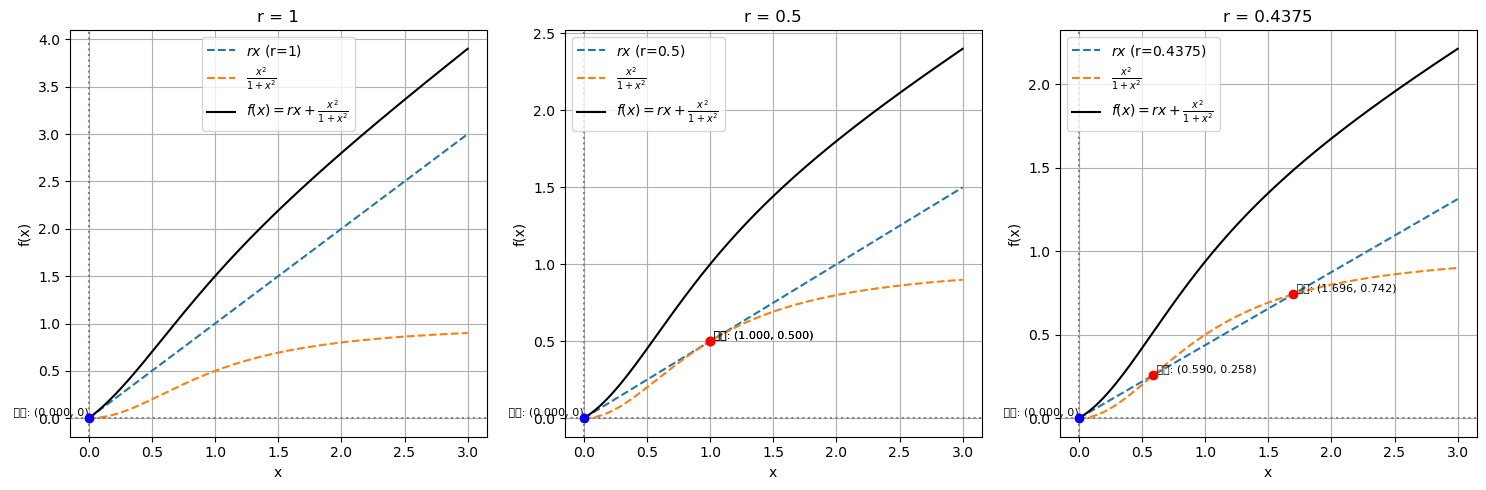

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# 定义函数
def first_term(x, r):
    return r * x

def second_term(x):
    return x**2 / (1 + x**2)

def f(x, r):
    return first_term(x, r) + second_term(x)

# 定义x的范围
x = np.linspace(0, 3, 500)

# 设置r的值
r_values = [1, 0.5, 0.4375]

# 创建图形
plt.figure(figsize=(15, 5))

for i, r in enumerate(r_values):
    plt.subplot(1, 3, i + 1)
    
    # 计算各项的值
    y_first = first_term(x, r)
    y_second = second_term(x)
    y_total = f(x, r)
    
    # 绘制曲线
    plt.plot(x, y_first, label=f'$rx$ (r={r})', linestyle='--')
    plt.plot(x, y_second, label='$\\frac{x^2}{1 + x^2}$', linestyle='--')
    plt.plot(x, y_total, label='$f(x) = rx + \\frac{x^2}{1 + x^2}$', color='black')
    
    # 计算第一项和第二项的交点（rx = x^2/(1+x^2)）
    # 解方程：r x = x^2 / (1 + x^2)
    # 即：r (1 + x^2) = x => r x^2 - x + r = 0
    a, b, c = r, -1, r
    discriminant = b**2 - 4 * a * c
    if discriminant >= 0:
        x_intersect = [(-b + np.sqrt(discriminant)) / (2 * a), 
                       (-b - np.sqrt(discriminant)) / (2 * a)]
        x_intersect = [x_int for x_int in x_intersect if x_int >= 0]  # 只取非负解
        for x_int in x_intersect:
            y_int = second_term(x_int)
            plt.scatter(x_int, y_int, color='red', zorder=5)
            plt.text(x_int, y_int, f' 交点: ({x_int:.3f}, {y_int:.3f})', 
                    fontsize=8, va='bottom')
    
    # 计算f(x)=0的零点
    def equation(x):
        return f(x, r)
    
    # 寻找初始猜测点（通过观察y_total的符号变化）
    sign_change = np.where(np.diff(np.sign(y_total)))[0]
    for idx in sign_change:
        x0 = x[idx]
        x_zero = fsolve(equation, x0)[0]
        if 0 <= x_zero <= x[-1]:  # 确保解在绘图范围内
            plt.scatter(x_zero, 0, color='blue', zorder=5)
            plt.text(x_zero, 0, f' 零点: ({x_zero:.3f}, 0)', 
                    fontsize=8, va='bottom', ha='right')
    
    plt.title(f'r = {r}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='gray', linestyle=':')
    plt.axvline(0, color='gray', linestyle=':')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

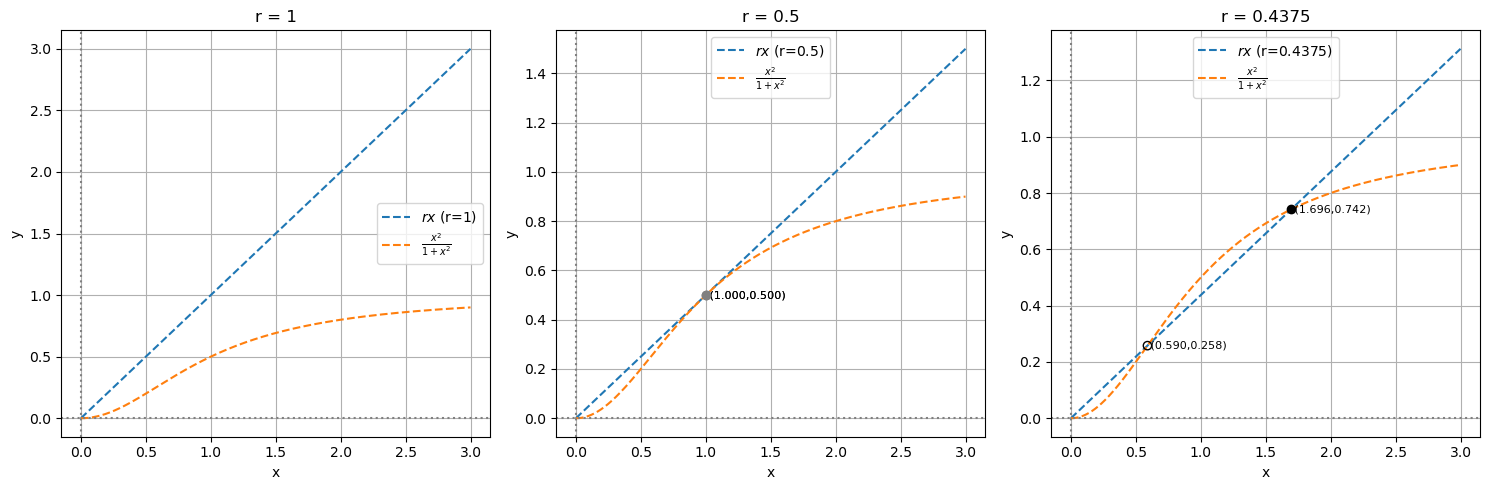

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# 定义函数
def first_term(x, r):
    return r * x

def second_term(x):
    return x**2 / (1 + x**2)

# 定义x的范围
x = np.linspace(0, 3, 500)

# 设置r的值
r_values = [1, 0.5, 0.4375]

# 创建图形
plt.figure(figsize=(15, 5))

for i, r in enumerate(r_values):
    plt.subplot(1, 3, i + 1)
    
    # 计算各项的值
    y_first = first_term(x, r)
    y_second = second_term(x)
    
    # 绘制曲线
    plt.plot(x, y_first, label=f'$rx$ (r={r})', linestyle='--')
    plt.plot(x, y_second, label='$\\frac{x^2}{1 + x^2}$', linestyle='--')
    
    # 计算第一项和第二项的交点（rx = x^2/(1+x^2)）
    a, b, c = r, -1, r
    discriminant = b**2 - 4 * a * c
    if discriminant >= 0:
        x_intersect = [(-b + np.sqrt(discriminant)) / (2 * a), 
                       (-b - np.sqrt(discriminant)) / (2 * a)]
        x_intersect = [x_int for x_int in x_intersect if x_int >= 0]
        
        # 第一张图所有点用黑色
        if i == 0:  # r=1
            for x_int in x_intersect:
                y_int = second_term(x_int)
                plt.scatter(x_int, y_int, color='black', zorder=5)
                plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                        fontsize=8, va='center')
        
        # 第二张图(1,0.5)用灰色
        elif i == 1:  # r=0.5
            for x_int in x_intersect:
                y_int = second_term(x_int)
                if np.isclose(x_int, 1.0) and np.isclose(y_int, 0.5):
                    plt.scatter(x_int, y_int, color='gray', zorder=5)
                    plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                            fontsize=8, va='center')
                else:
                    plt.scatter(x_int, y_int, color='black', zorder=5)
                    plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                            fontsize=8, va='center')
        
        # 第三张图中间点用空心
        elif i == 2:  # r=0.4375
            for j, x_int in enumerate(x_intersect):
                y_int = second_term(x_int)
                if j == 1:  # 中间的点
                    plt.scatter(x_int, y_int, facecolors='none', 
                               edgecolors='black', zorder=5)
                    plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                            fontsize=8, va='center')
                else:
                    plt.scatter(x_int, y_int, color='black', zorder=5)
                    plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                            fontsize=8, va='center')
    
    plt.title(f'r = {r}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='gray', linestyle=':')
    plt.axvline(0, color='gray', linestyle=':')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

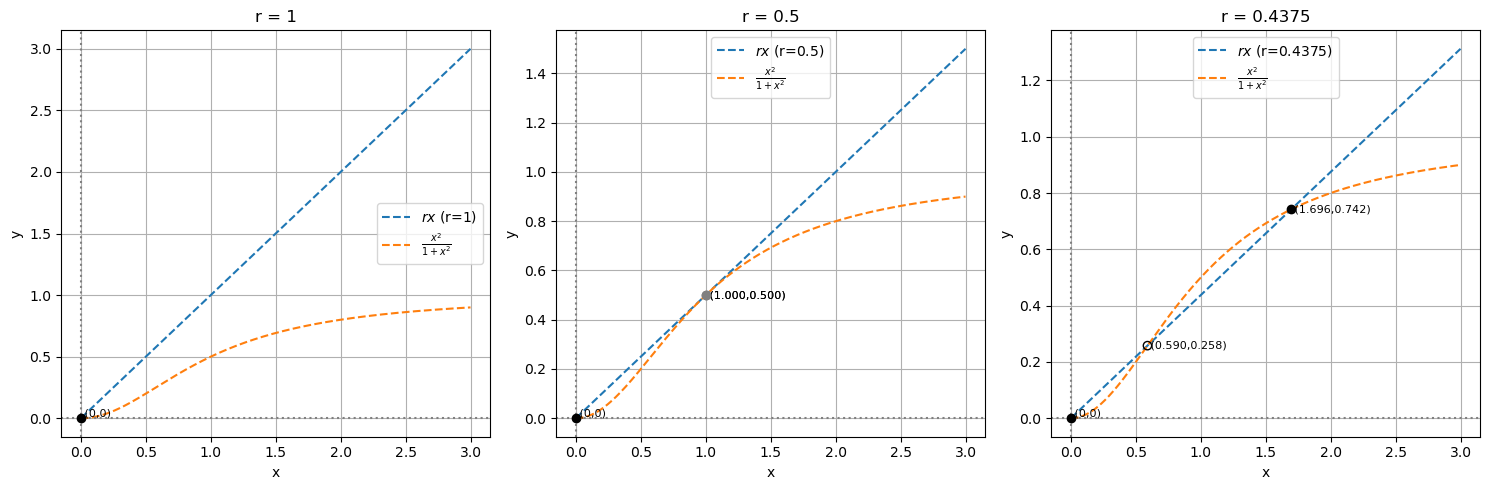

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# 定义函数
def first_term(x, r):
    return r * x

def second_term(x):
    return x**2 / (1 + x**2)

# 定义x的范围
x = np.linspace(0, 3, 500)

# 设置r的值
r_values = [1, 0.5, 0.4375]

# 创建图形
plt.figure(figsize=(15, 5))

for i, r in enumerate(r_values):
    plt.subplot(1, 3, i + 1)
    
    # 计算各项的值
    y_first = first_term(x, r)
    y_second = second_term(x)
    
    # 绘制曲线
    plt.plot(x, y_first, label=f'$rx$ (r={r})', linestyle='--')
    plt.plot(x, y_second, label='$\\frac{x^2}{1 + x^2}$', linestyle='--')
    
    # 标注原点(0,0)为黑色实心点
    plt.scatter(0, 0, color='black', zorder=5)
    plt.text(0, 0, ' (0,0)', fontsize=8, va='bottom')
    
    # 计算第一项和第二项的交点（rx = x^2/(1+x^2)）
    a, b, c = r, -1, r
    discriminant = b**2 - 4 * a * c
    if discriminant >= 0:
        x_intersect = [(-b + np.sqrt(discriminant)) / (2 * a), 
                       (-b - np.sqrt(discriminant)) / (2 * a)]
        x_intersect = [x_int for x_int in x_intersect if x_int >= 0]
        
        # 第一张图所有点用黑色
        if i == 0:  # r=1
            for x_int in x_intersect:
                y_int = second_term(x_int)
                plt.scatter(x_int, y_int, color='black', zorder=5)
                plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                        fontsize=8, va='center')
        
        # 第二张图(1,0.5)用灰色
        elif i == 1:  # r=0.5
            for x_int in x_intersect:
                y_int = second_term(x_int)
                if np.isclose(x_int, 1.0) and np.isclose(y_int, 0.5):
                    plt.scatter(x_int, y_int, color='gray', zorder=5)
                    plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                            fontsize=8, va='center')
                else:
                    plt.scatter(x_int, y_int, color='black', zorder=5)
                    plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                            fontsize=8, va='center')
        
        # 第三张图中间点用空心
        elif i == 2:  # r=0.4375
            for j, x_int in enumerate(x_intersect):
                y_int = second_term(x_int)
                if j == 1:  # 中间的点
                    plt.scatter(x_int, y_int, facecolors='none', 
                               edgecolors='black', zorder=5)
                    plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                            fontsize=8, va='center')
                else:
                    plt.scatter(x_int, y_int, color='black', zorder=5)
                    plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                            fontsize=8, va='center')
    
    plt.title(f'r = {r}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='gray', linestyle=':')
    plt.axvline(0, color='gray', linestyle=':')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

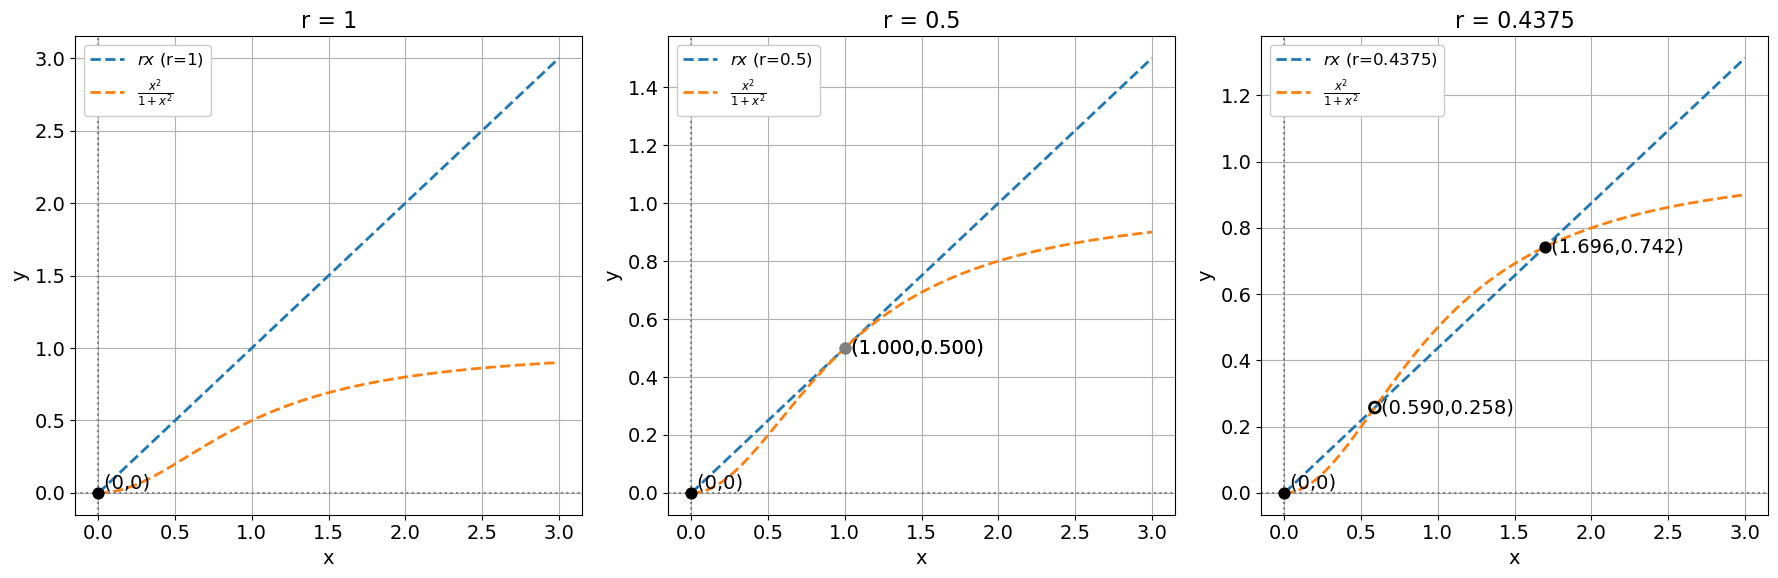

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# 设置全局字体大小（增大两号）
plt.rcParams.update({'font.size': 14})  # 默认是10，增大到14

# 定义函数
def first_term(x, r):
    return r * x

def second_term(x):
    return x**2 / (1 + x**2)

# 定义x的范围
x = np.linspace(0, 3, 500)

# 设置r的值
r_values = [1, 0.5, 0.4375]

# 创建图形（调整画布大小适应大字号）
plt.figure(figsize=(18, 6))

for i, r in enumerate(r_values):
    plt.subplot(1, 3, i + 1)
    
    # 计算各项的值
    y_first = first_term(x, r)
    y_second = second_term(x)
    
    # 绘制曲线（线宽也适当加粗）
    plt.plot(x, y_first, label=f'$rx$ (r={r})', linestyle='--', linewidth=2)
    plt.plot(x, y_second, label='$\\frac{x^2}{1 + x^2}$', linestyle='--', linewidth=2)
    
    # 标注原点(0,0)为黑色实心点
    plt.scatter(0, 0, color='black', zorder=5, s=60)  # s参数调大点的大小
    plt.text(0, 0, ' (0,0)', fontsize=14, va='bottom', ha='left')
    
    # 计算第一项和第二项的交点
    a, b, c = r, -1, r
    discriminant = b**2 - 4 * a * c
    if discriminant >= 0:
        x_intersect = [(-b + np.sqrt(discriminant)) / (2 * a), 
                       (-b - np.sqrt(discriminant)) / (2 * a)]
        x_intersect = [x_int for x_int in x_intersect if x_int >= 0]
        
        # 第一张图所有点用黑色
        if i == 0:  # r=1
            for x_int in x_intersect:
                y_int = second_term(x_int)
                plt.scatter(x_int, y_int, color='black', zorder=5, s=60)
                plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                        fontsize=14, va='center')
        
        # 第二张图(1,0.5)用灰色
        elif i == 1:  # r=0.5
            for x_int in x_intersect:
                y_int = second_term(x_int)
                if np.isclose(x_int, 1.0) and np.isclose(y_int, 0.5):
                    plt.scatter(x_int, y_int, color='gray', zorder=5, s=60)
                    plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                            fontsize=14, va='center')
                else:
                    plt.scatter(x_int, y_int, color='black', zorder=5, s=60)
                    plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                            fontsize=14, va='center')
        
        # 第三张图中间点用空心
        elif i == 2:  # r=0.4375
            for j, x_int in enumerate(x_intersect):
                y_int = second_term(x_int)
                if j == 1:  # 中间的点
                    plt.scatter(x_int, y_int, facecolors='none', 
                               edgecolors='black', zorder=5, s=60, linewidth=2)
                    plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                            fontsize=14, va='center')
                else:
                    plt.scatter(x_int, y_int, color='black', zorder=5, s=60)
                    plt.text(x_int, y_int, f' ({x_int:.3f},{y_int:.3f})', 
                            fontsize=14, va='center')
    
    plt.title(f'r = {r}', fontsize=16)  # 标题再大一号
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.axhline(0, color='gray', linestyle=':')
    plt.axvline(0, color='gray', linestyle=':')
    
    # 图例放在左上角，并适当放大
    plt.legend(loc='upper left', fontsize=12, framealpha=1)
    plt.grid()

plt.tight_layout()
plt.show()